# Esercizio 1

**Distribuzioni con probabilità**

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import math
import pandas as pd

In [3]:
# Generiamo 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1

# Importiamo 'gamma' da 'scipy.stats'
from scipy.stats import gamma

dist = gamma.rvs(a=1, scale=2, size=1000, random_state=42)

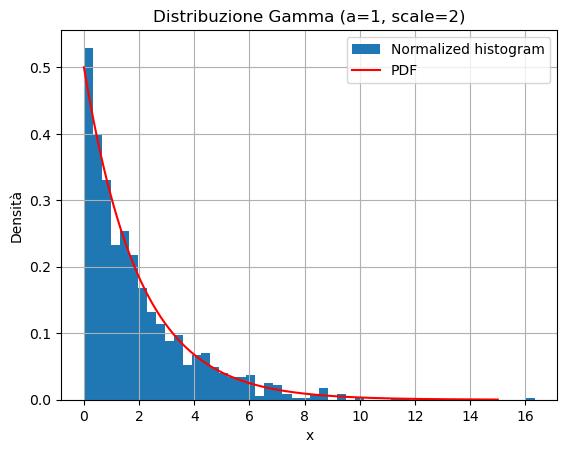

In [4]:
# Tracciamo l’istogramma del campione e sovrapponi la PDF della distribuzione

# Istogramma normalizzato
plt.hist(dist, bins = 50, density = True, label = 'Normalized histogram')

# PDF teorica
x = np.linspace(0, 15, 500)
pdf = gamma.pdf(x, a=1, scale=2)
plt.plot(x, pdf, 'r-', label='PDF')

# Etichette e legenda
plt.xlabel('x')
plt.ylabel('Densità')
plt.title('Distribuzione Gamma (a=1, scale=2)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Stimiamio il parametro di forma dal campione usando il metodo 'fit'

shape, loc, scale = gamma.fit(dist)
print(f"Parametro di forma stimato: {shape}")

Parametro di forma stimato: 0.9596112510552852


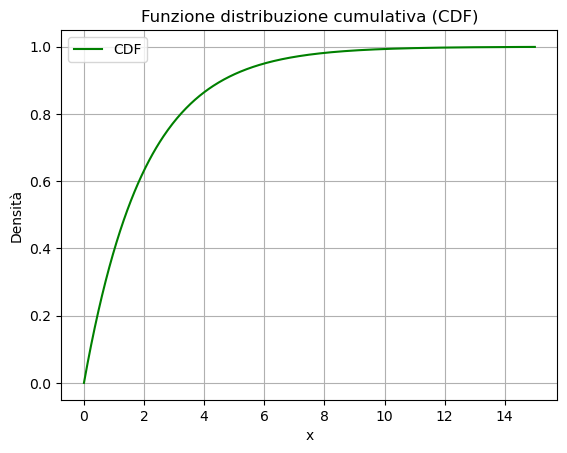

In [6]:
# Tracciamo la funzione di distribuzione cumulativa CDF

# CDF teorica
x = np.linspace(0, 15, 500)
pdf = gamma.cdf(x, a=1, scale=2)
plt.plot(x, pdf, 'g-', label='CDF')

# Etichette e legenda
plt.xlabel('x')
plt.ylabel('Densità')
plt.title('Funzione distribuzione cumulativa (CDF)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Calcoliamo la varianza

var = np.std(dist) / np.mean(dist)
print(f"Valore varianza: {var}")

Valore varianza: 0.9995039224458866


# Esercizio 2

**Fitta i dati**

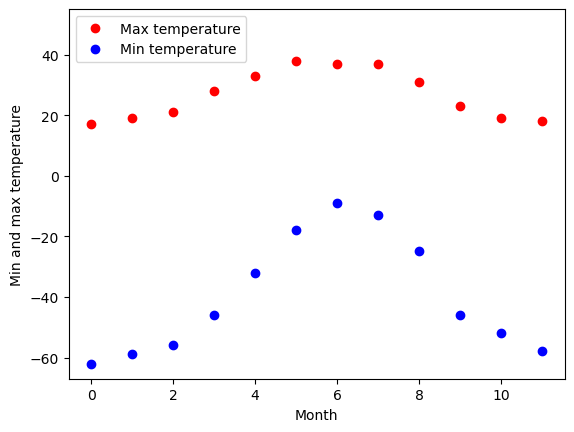

In [8]:
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)

plt.plot(months, temp_max, "ro", label="Max temperature")
plt.plot(months, temp_min, "bo", label="Min temperature")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
plt.ylim(top=55)
plt.legend(loc='upper left')
plt.show()

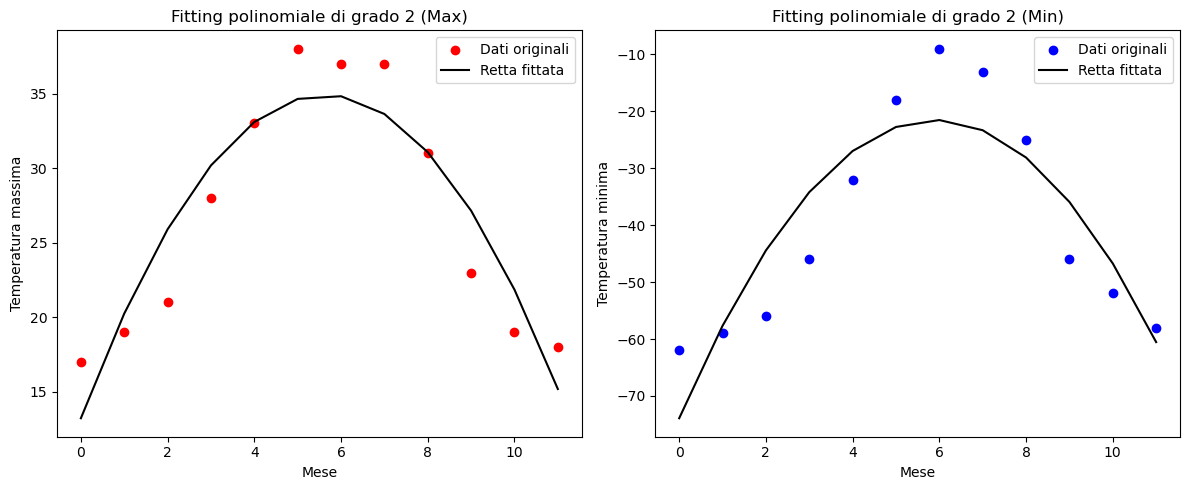

In [9]:
# Fit polinomiale di grado 2 per 'temp_max'
a1, b1, c1 = np.polyfit(months, temp_max, 2)
y_fit_max = a1 * months**2 + b1 * months + c1

# Fit polinomiale di grado 2 per 'temp_min'
a2, b2, c2 = np.polyfit(months, temp_min, 2)
y_fit_min = a2 * months**2 + b2 * months + c2

# Creazione dei subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 riga, 2 colonne

# Primo grafico - temp_max
axs[0].scatter(months, temp_max, label="Dati originali", color="red")
axs[0].plot(months, y_fit_max, label="Retta fittata", color="black")
axs[0].set_xlabel("Mese")
axs[0].set_ylabel("Temperatura massima")
axs[0].set_title("Fitting polinomiale di grado 2 (Max)")
axs[0].legend()

# Secondo grafico - temp_min
axs[1].scatter(months, temp_min, label="Dati originali", color="blue")
axs[1].plot(months, y_fit_min, label="Retta fittata", color="black")
axs[1].set_xlabel("Mese")
axs[1].set_ylabel("Temperatura minima")
axs[1].set_title("Fitting polinomiale di grado 2 (Min)")
axs[1].legend()

plt.tight_layout()
plt.show()

In [10]:
# Calcoliamo il MAE (Mean Absolute Error) e il RMSE (Root Mean Squared Error)

# Metriche per 'temp_max'
mae1 = np.mean(np.abs(temp_max - y_fit_max))
rmse1 = np.sqrt(np.mean((temp_max - y_fit_max)**2))

# Metriche per 'temp_min'
mae2 = np.mean(np.abs(temp_min - y_fit_min))
rmse2 = np.sqrt(np.mean((temp_min - y_fit_min)**2))

print(f"MAE per 'temp_max': {mae1}")
print(f"MAE per 'temp_min': {mae2}")
print(f"RMSE per 'temp_max': {rmse1}")
print(f"RMSE per 'temp_min': {rmse2}")

MAE per 'temp_max': 2.581793206793208
MAE per 'temp_min': 7.520979020979026
RMSE per 'temp_max': 2.96016046018623
RMSE per 'temp_min': 8.533903317211056


# Esercizio 3

**Modello di regressione lineare**

In [11]:
# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


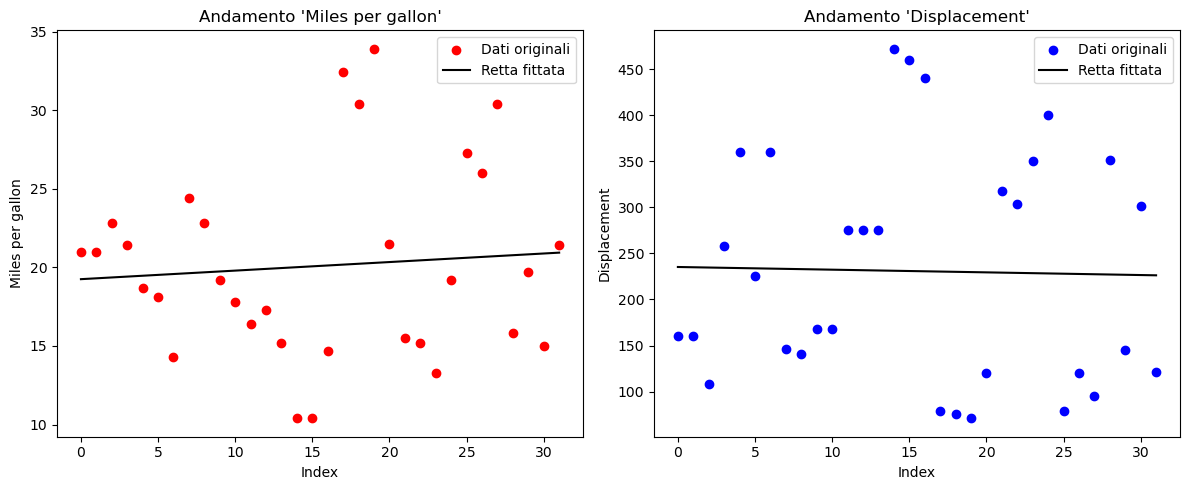

In [12]:
# Modello lineare
def lineare(x, a, b):
    return a * x + b

# Fit
popt1, _ = sp.optimize.curve_fit(lineare, df["mpg"].index, df["mpg"])
y_pred1 = lineare(df["mpg"].index, *popt1)
popt2, _ = sp.optimize.curve_fit(lineare, df["disp"].index, df["disp"])
y_pred2 = lineare(df["disp"].index, *popt2)

# Creazione dei subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 riga, 2 colonne

# Primo grafico - temp_max
axs[0].scatter(df["mpg"].index, df["mpg"], label="Dati originali", color="red")
axs[0].plot(df["mpg"].index, y_pred1, label="Retta fittata", color="black")
axs[0].set_xlabel("Index")
axs[0].set_ylabel("Miles per gallon")
axs[0].set_title("Andamento 'Miles per gallon'")
axs[0].legend()

# Secondo grafico - temp_min
axs[1].scatter(df["disp"].index, df["disp"], label="Dati originali", color="blue")
axs[1].plot(df["disp"].index, y_pred2, label="Retta fittata", color="black")
axs[1].set_xlabel("Index")
axs[1].set_ylabel("Displacement")
axs[1].set_title("Andamento 'Displacement'")
axs[1].legend()

plt.tight_layout()
plt.show()